In [23]:
import pandas as pd

file_path = "/content/gesture_robot_control_20000 (1).xlsx"
df = pd.read_excel(file_path)

df.head()


,Gesture_ID,Gesture_Name,Command,Fingers_Detected,Sensor_Angle (°),Action_Duration (sec)
0,G0001,Two Fingers,Turn Right,2,45,1.01
1,G0002,Open Palm,Move Forward,5,90,1.52
2,G0003,Open Palm,Move Forward,5,90,1.40
3,G0004,Two Fingers,Turn Right,2,45,1.89
4,G0005,Palm Down,Move Backward,5,180,3.21


In [24]:

df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gesture_ID             20000 non-null  object 
 1   Gesture_Name           20000 non-null  object 
 2   Command                20000 non-null  object 
 3   Fingers_Detected       20000 non-null  int64  
 4   Sensor_Angle (°)       20000 non-null  int64  
 5   Action_Duration (sec)  20000 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 937.6+ KB


,0
Gesture_ID,0
Gesture_Name,0
Command,0
Fingers_Detected,0
Sensor_Angle (°),0
Action_Duration (sec),0


In [26]:

df.info()

print(df.isnull().sum())

df.describe()

print("Unique Commands:", df['Command'].nunique())
print("Command Distribution:\n", df['Command'].value_counts())





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gesture_ID             20000 non-null  object 
 1   Gesture_Name           20000 non-null  object 
 2   Command                20000 non-null  object 
 3   Fingers_Detected       20000 non-null  int64  
 4   Sensor_Angle (°)       20000 non-null  int64  
 5   Action_Duration (sec)  20000 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 937.6+ KB
Gesture_ID               0
Gesture_Name             0
Command                  0
Fingers_Detected         0
Sensor_Angle (°)         0
Action_Duration (sec)    0
dtype: int64
Unique Commands: 6
Command Distribution:
 Command
Move Forward     3390
Turn Left        3379
Move Backward    3343
Stop             3306
Turn Right       3293
Pick Object      3289
Name: count, dtype: int64


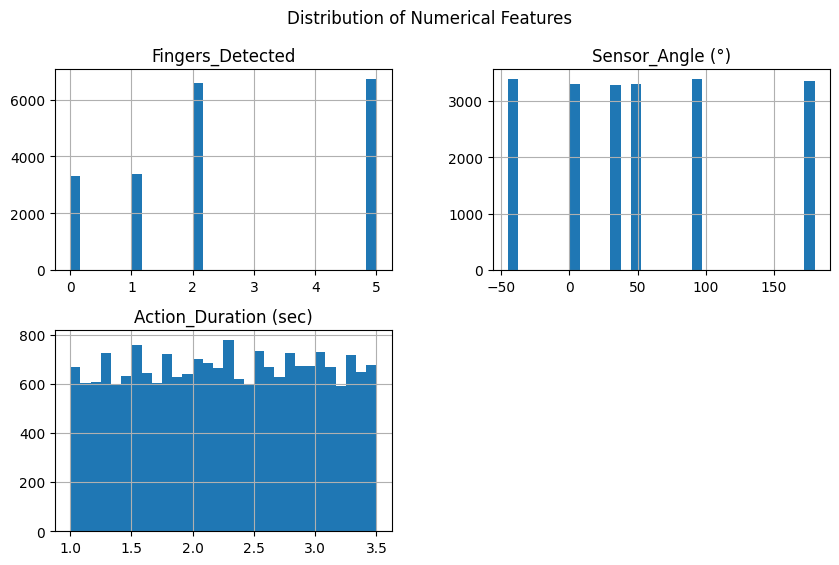

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric_cols = ['Fingers_Detected', 'Sensor_Angle (°)', 'Action_Duration (sec)']
df[numeric_cols].hist(bins=30, figsize=(10, 6))
plt.suptitle("Distribution of Numerical Features")
plt.show()

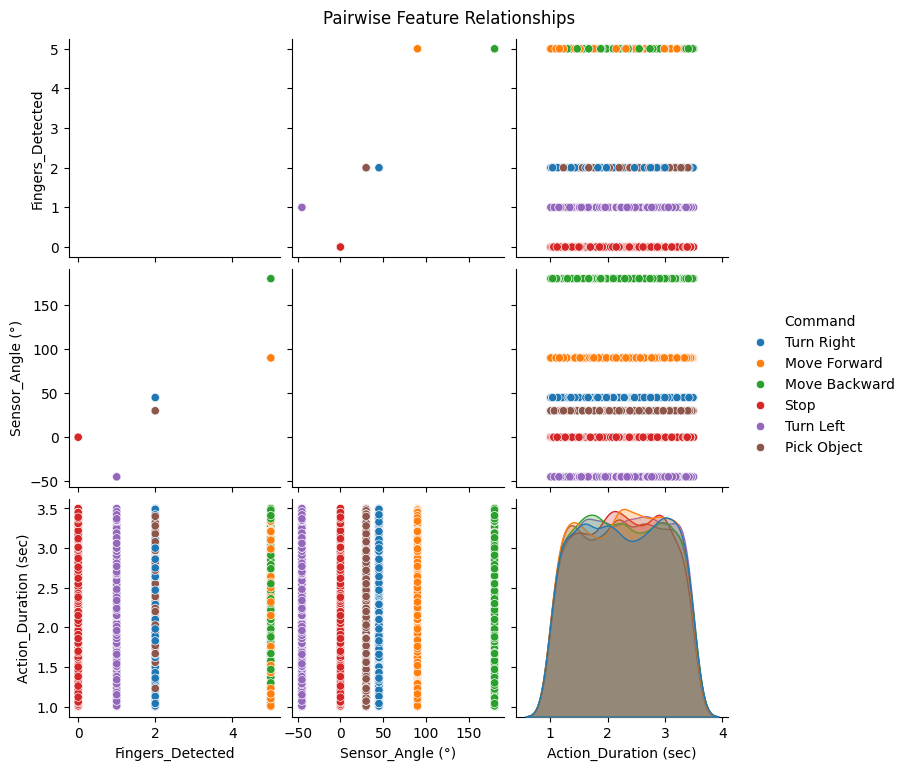

In [28]:
sns.pairplot(df[numeric_cols + ['Command']], hue="Command", diag_kind="kde")
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()

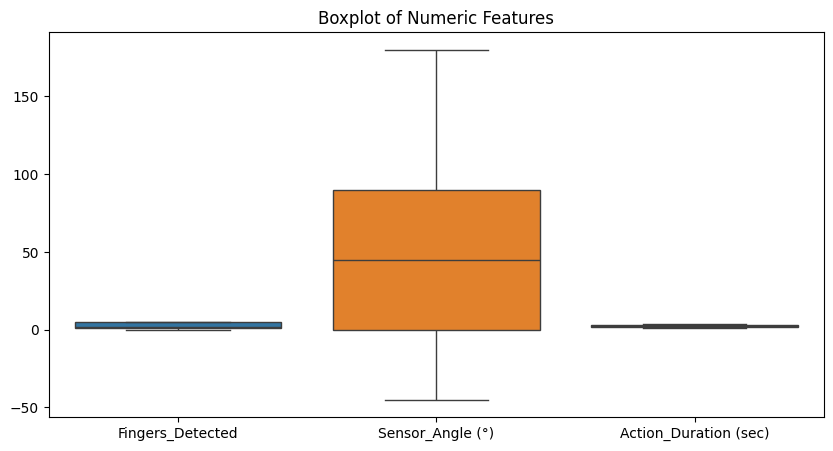

In [29]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[numeric_cols])
plt.title("Boxplot of Numeric Features")
plt.show()

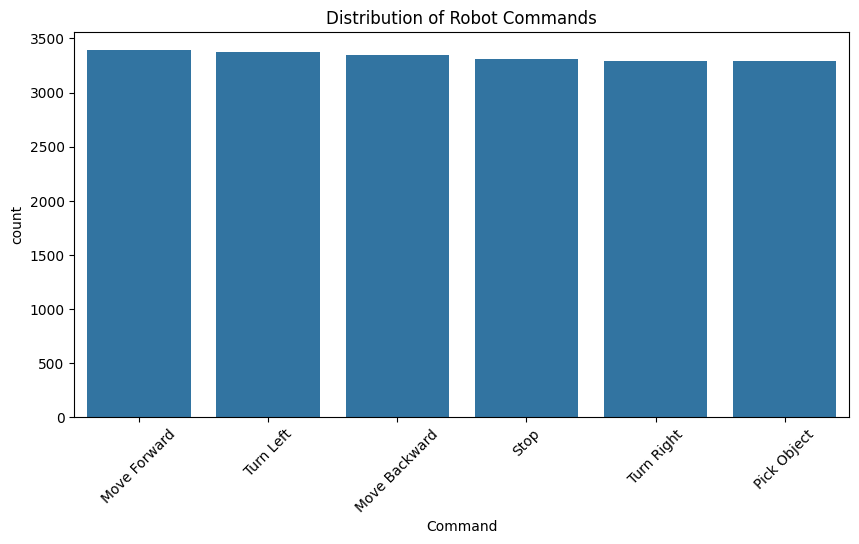

In [30]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Command', order=df['Command'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Distribution of Robot Commands")
plt.show()

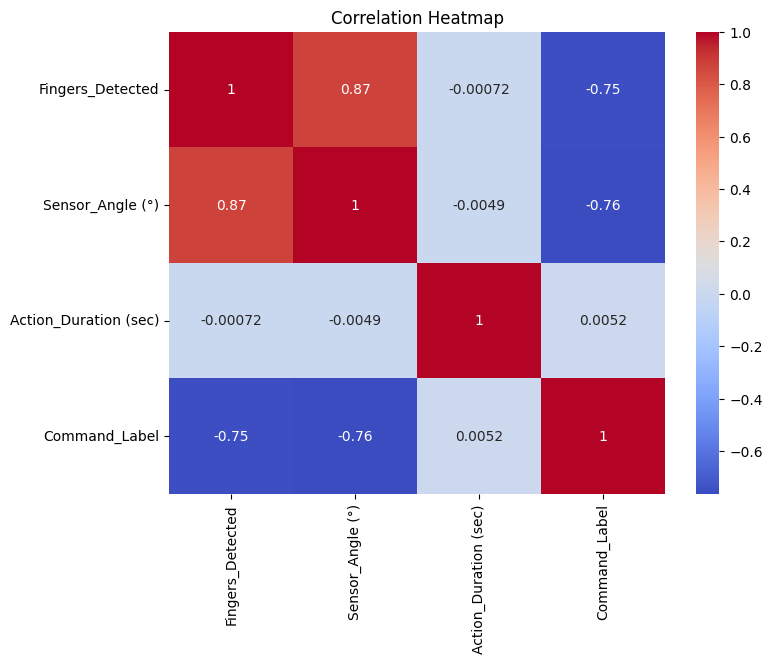

In [45]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [35]:

from sklearn.preprocessing import LabelEncoder, StandardScaler

cols_to_drop = ['Gesture_ID', 'Gesture_Name']
df = df.drop(columns=[col for col in cols_to_drop if col in df.columns])

le = LabelEncoder()
df['Command_Label'] = le.fit_transform(df['Command'])

X = df[['Fingers_Detected', 'Sensor_Angle (°)', 'Action_Duration (sec)']]
y = df['Command_Label']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [37]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [39]:


from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

svm = SVC()
svm.fit(X_train, y_train)

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [40]:

from sklearn.metrics import accuracy_score, classification_report

y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))

y_pred_svm = svm.predict(X_test)
print("\nSVM Accuracy:", accuracy_score(y_test, y_pred_svm))

y_pred_lr = lr.predict(X_test)
print("\nLogistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))


Random Forest Accuracy: 1.0
               precision    recall  f1-score   support

Move Backward       1.00      1.00      1.00       672
 Move Forward       1.00      1.00      1.00       626
  Pick Object       1.00      1.00      1.00       635
         Stop       1.00      1.00      1.00       696
    Turn Left       1.00      1.00      1.00       691
   Turn Right       1.00      1.00      1.00       680

     accuracy                           1.00      4000
    macro avg       1.00      1.00      1.00      4000
 weighted avg       1.00      1.00      1.00      4000


SVM Accuracy: 1.0

Logistic Regression Accuracy: 1.0


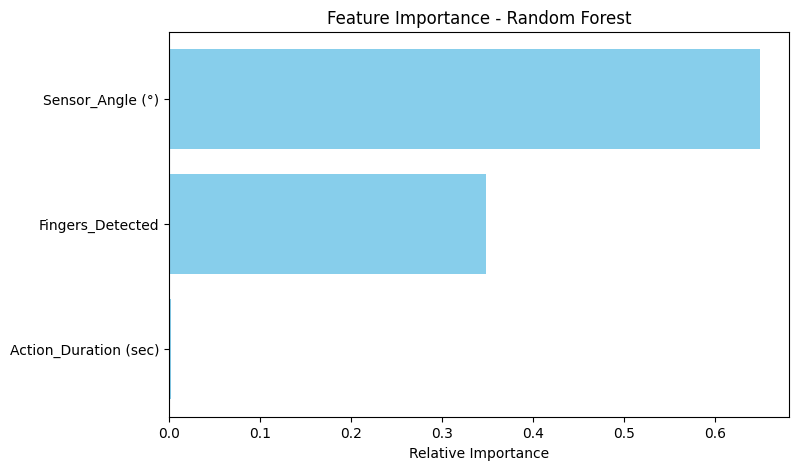

In [46]:
import numpy as np

importances = rf.feature_importances_
features = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(8, 5))
plt.barh(range(len(indices)), importances[indices], color='skyblue')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Relative Importance")
plt.title("Feature Importance - Random Forest")
plt.show()


In [47]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf, X_scaled, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean CV Accuracy: 1.0


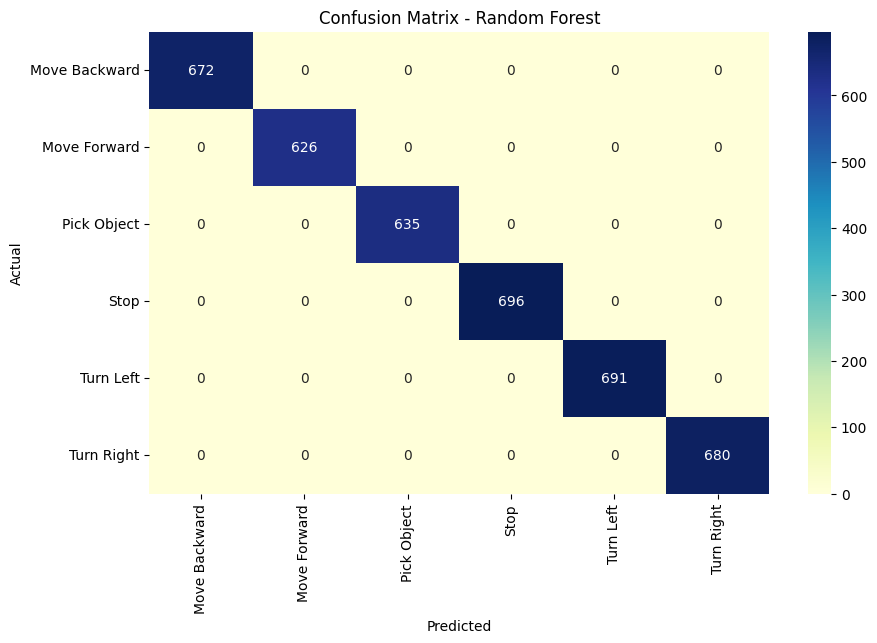

In [41]:


from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


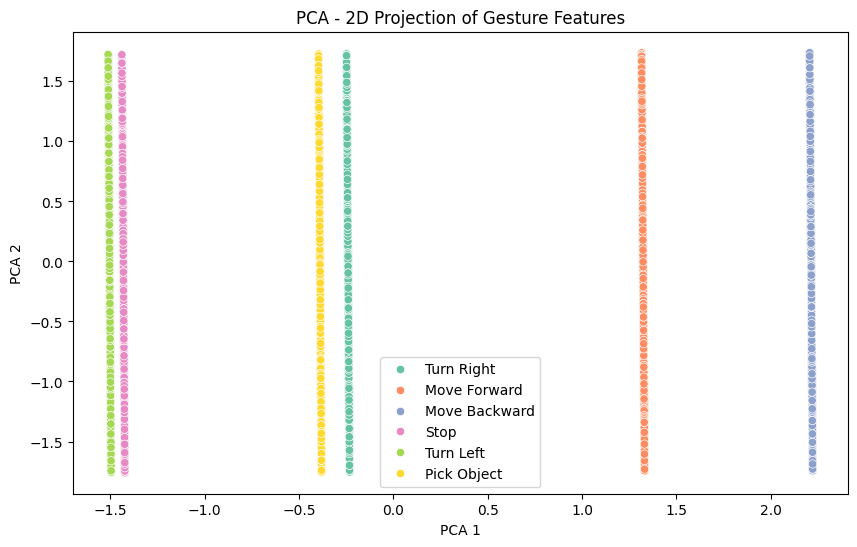

In [49]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=le.inverse_transform(y), palette="Set2")
plt.title("PCA - 2D Projection of Gesture Features")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


In [42]:

import joblib

joblib.dump(rf, 'gesture_robot_rf_model.pkl')
joblib.dump(scaler, 'gesture_scaler.pkl')
joblib.dump(le, 'label_encoder.pkl')

print("Model, Scaler, and LabelEncoder saved.")


Model, Scaler, and LabelEncoder saved.


In [43]:

rf_model = joblib.load('gesture_robot_rf_model.pkl')
scaler = joblib.load('gesture_scaler.pkl')
le = joblib.load('label_encoder.pkl')

sample = [[3, 45, 1.8]]
sample_scaled = scaler.transform(sample)

pred = rf_model.predict(sample_scaled)
predicted_command = le.inverse_transform(pred)

print("Predicted Robot Command:", predicted_command[0])


Predicted Robot Command: Turn Right


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
